# Cautionary Tales in Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

### The sets of data below are together called "Anscombe's quartet."

In [72]:
x123 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [4]:
datasets = pd.DataFrame({
    'dataset': np.repeat(['1','2','3','4'], len(x123)),
    'x': np.concatenate([x123, x123, x123, x4]),
    'y': np.concatenate([y1, y2, y3, y4])
})

df1 = datasets[datasets['dataset'] == '1']
df2 = datasets[datasets['dataset'] == '2']
df3 = datasets[datasets['dataset'] == '3']
df4 = datasets[datasets['dataset'] == '4']

### Just from summary stats they look identical...

In [6]:
df1.describe(), df2.describe(), df3.describe(), df4.describe()

(               x          y
 count  11.000000  11.000000
 mean    9.000000   7.500909
 std     3.316625   2.031568
 min     4.000000   4.260000
 25%     6.500000   6.315000
 50%     9.000000   7.580000
 75%    11.500000   8.570000
 max    14.000000  10.840000,
                x          y
 count  11.000000  11.000000
 mean    9.000000   7.500909
 std     3.316625   2.031657
 min     4.000000   3.100000
 25%     6.500000   6.695000
 50%     9.000000   8.140000
 75%    11.500000   8.950000
 max    14.000000   9.260000,
                x          y
 count  11.000000  11.000000
 mean    9.000000   7.500000
 std     3.316625   2.030424
 min     4.000000   5.390000
 25%     6.500000   6.250000
 50%     9.000000   7.110000
 75%    11.500000   7.980000
 max    14.000000  12.740000,
                x          y
 count  11.000000  11.000000
 mean    9.000000   7.500909
 std     3.316625   2.030579
 min     8.000000   5.250000
 25%     8.000000   6.170000
 50%     8.000000   7.040000
 75%     8.

### The fitted regression lines & inference are identical too...

In [8]:
mod1 = smf.ols('y~x', df1).fit()
mod2 = smf.ols('y~x', df2).fit()
mod3 = smf.ols('y~x', df3).fit()
mod4 = smf.ols('y~x', df4).fit()

In [9]:
mod1.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 03 Sep 2024   Prob (F-statistic):            0.00217
Time:                        09:46:00   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
 mod2.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Tue, 03 Sep 2024   Prob (F-statistic):            0.00218
Time:                        09:46:00   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
 mod3.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Tue, 03 Sep 2024   Prob (F-statistic):            0.00218
Time:                        09:46:00   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
 mod4.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Tue, 03 Sep 2024   Prob (F-statistic):            0.00216
Time:                        09:46:00   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## So we're thinking these datasets are very similar, right?? 

It's a trap!! Just studying summary stats and model fits without visualizing doesn't give us the full picture. Visualizing the data gives us a totally different story. 

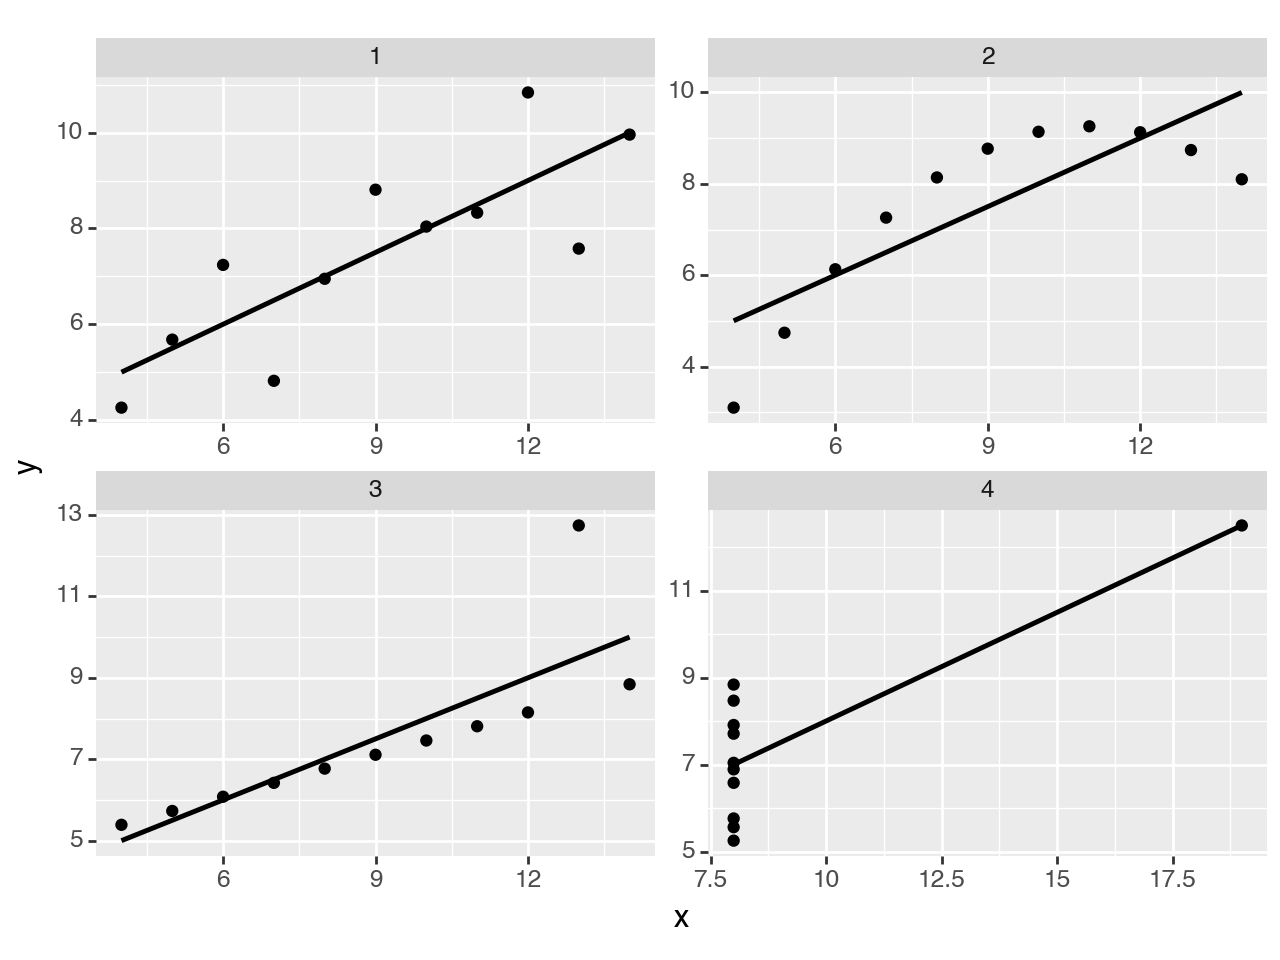

<Figure Size: (640 x 480)>

In [15]:
ggplot(datasets, aes(x = 'x', y = 'y', group = 'dataset')) + \
       geom_point() + \
       geom_smooth(method = 'lm', formula = 'y~x', se = False) + \
       facet_wrap('dataset', scales='free')

## Exercise:

1. For each dataset (1 - 4), argue whether the fitted linear regression is an appropriate fit for the data. If not, argue why regression may not be the best idea, and if possible, cite specific model assumptions which are violated. 

## Another problem to watch out for: Extrapolation

Here's an example dataset of speed (mph) & stopping distances (ft). Note: the cars in this dataset are a sample collected in 1920. 

In [29]:
cars = pd.read_csv("/Users/cjcarroll/Desktop/repos/regression_f24/data/cars.csv")
cars.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [32]:
cars.columns

Index(['Unnamed: 0', 'speed', 'dist'], dtype='object')

In [34]:
cars.drop('Unnamed: 0', axis = 1, inplace=True) #get rid of weird 1st col

In [36]:
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Let's plot the data. 

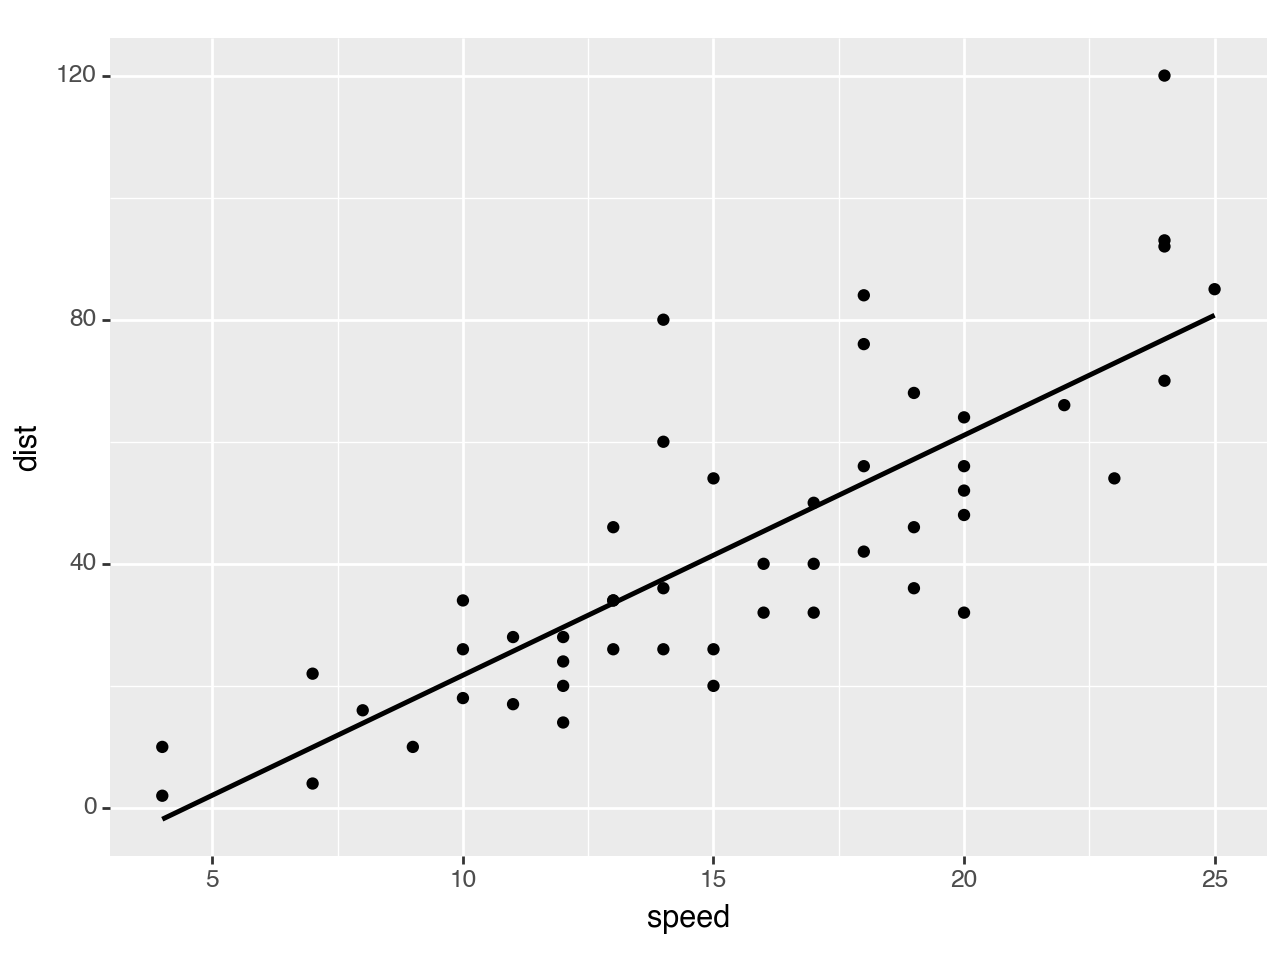

<Figure Size: (640 x 480)>

In [39]:
ggcars = (ggplot(cars, aes(x='speed', y='dist')) + 
                 geom_point() + geom_smooth(method = "lm", se = False))

ggcars

In [41]:
mod_cars = smf.ols('dist~speed', cars).fit()
mod_cars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.49e-12
Time:                        09:46:03   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ok, everything seems pretty good so far...

Now let's say I wanted to estimate the distance taken to stop for a car going 120mph.

In [45]:
newdata = pd.DataFrame({'speed': [120]})
pred = mod_cars.predict(newdata)
newdata['dist']=pred

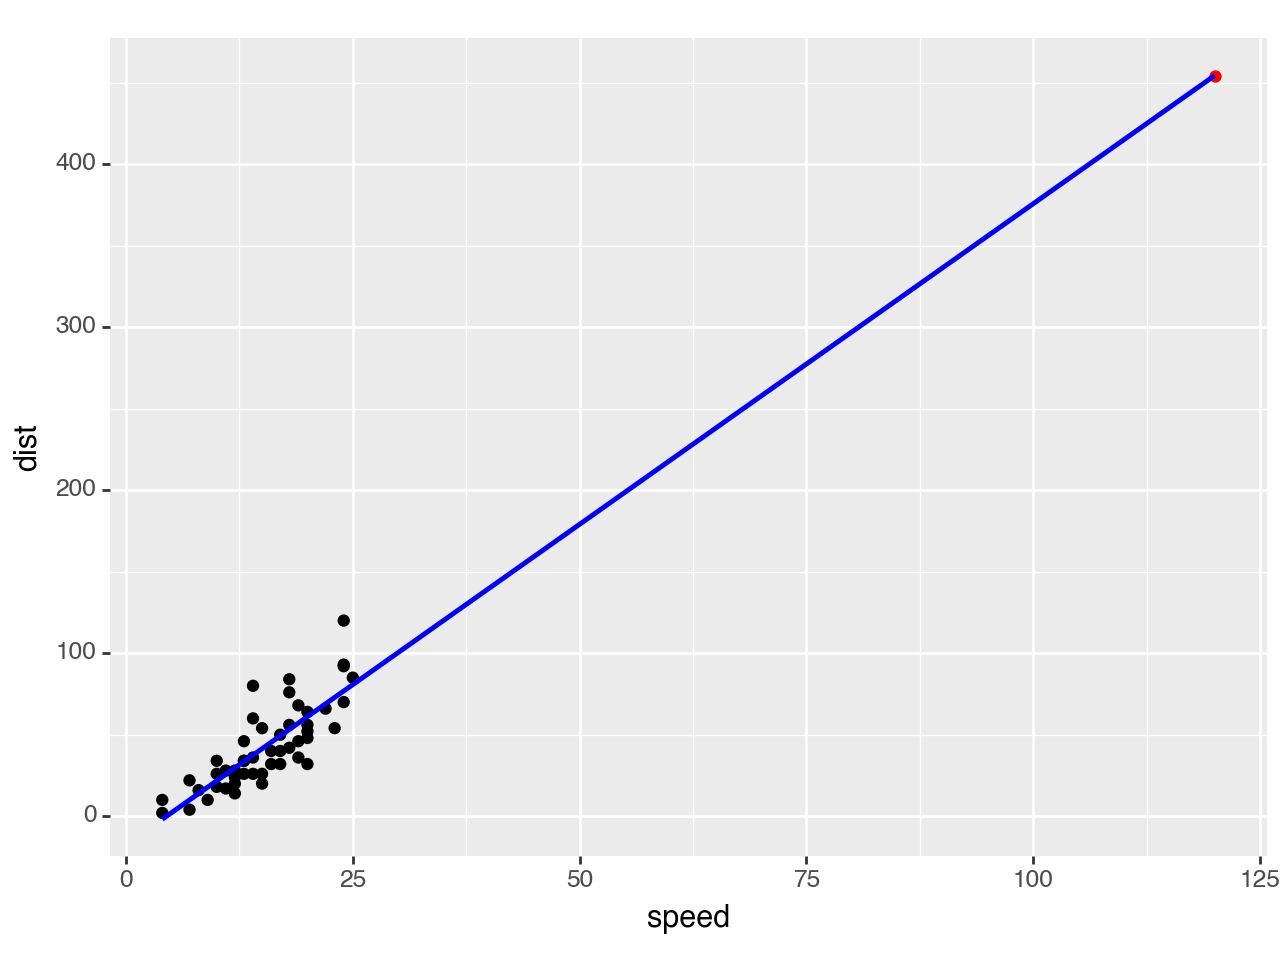

<Figure Size: (640 x 480)>

In [47]:
(ggplot(cars, aes(x='speed', y='dist')) + 
  geom_point() + 
  geom_point(data=newdata, color = 'red') + 
  geom_smooth(method = "lm", se = False, fullrange=True, color = "blue"))

Ok.... but does this seem reasonable? Using your **common sense**!

What kind of cars were going 120mph in 1920?????
Not a sensible question to ask!

Additionally, we have no data near the point of a car going 120 mph, so we have no concrete evidence that the linear trend would continue. In other words, some other trend may occur once we get to extreme speeds.

These problems are some of the issues associated with *extrapolation*.

Extrapolation occurs when you try to use an estimated regression equation to predict a new y value for x values outside of the range of of the sample data used to determine the regression equation.




### Another extrapolation example... from the Anscombe dataset you saw before:

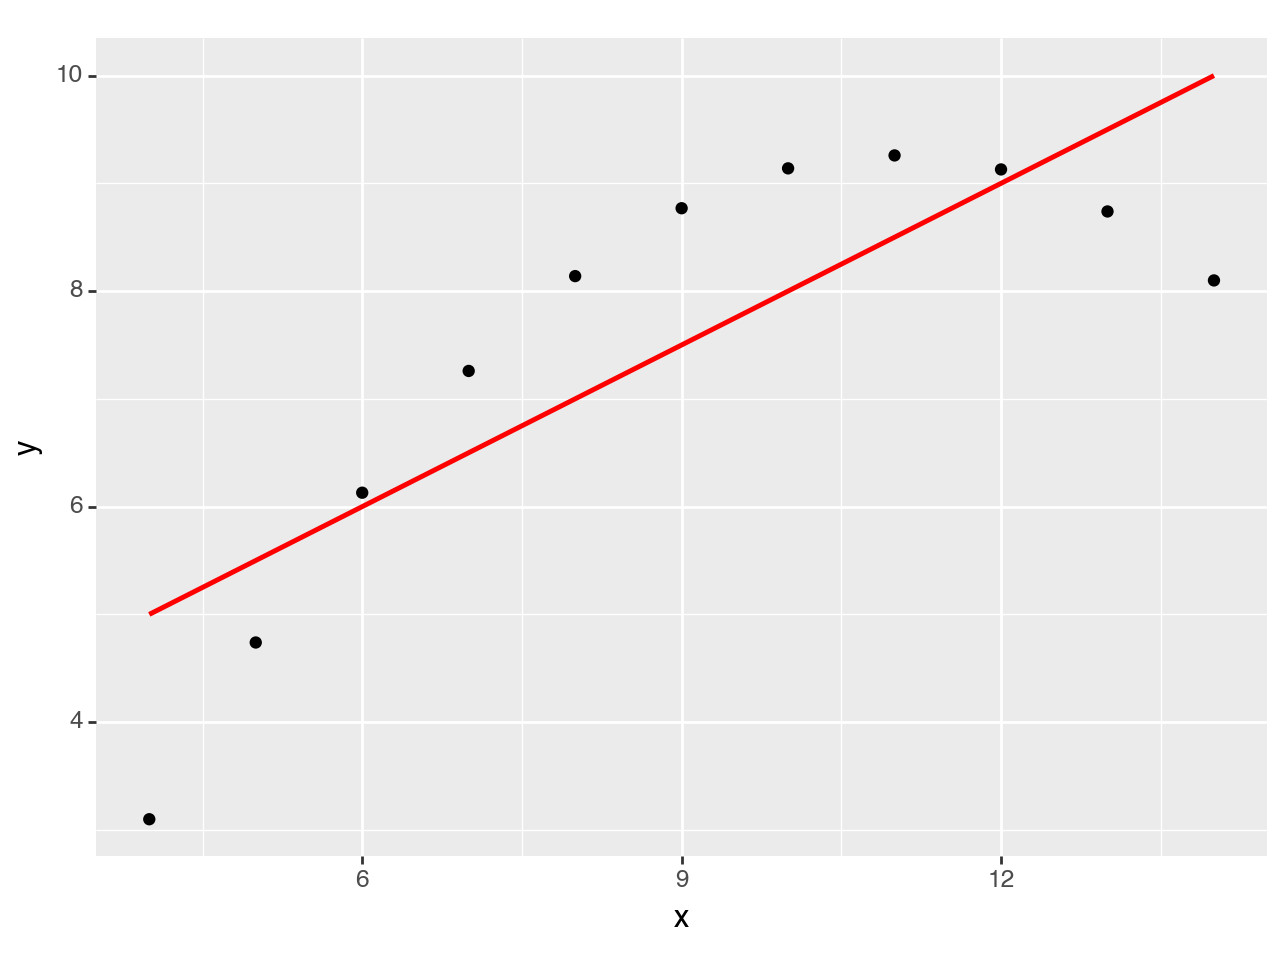

<Figure Size: (640 x 480)>

In [51]:
(ggplot(df2, aes(x='x', y='y')) + 
  geom_point() + geom_smooth(method = "lm", se = False, color = "red"))

#### If we try to predict y for a new x observation at x = 20....

In [54]:
newdata2 = pd.DataFrame({'x': [20]})
newdata2['y']= mod2.predict(newdata2)

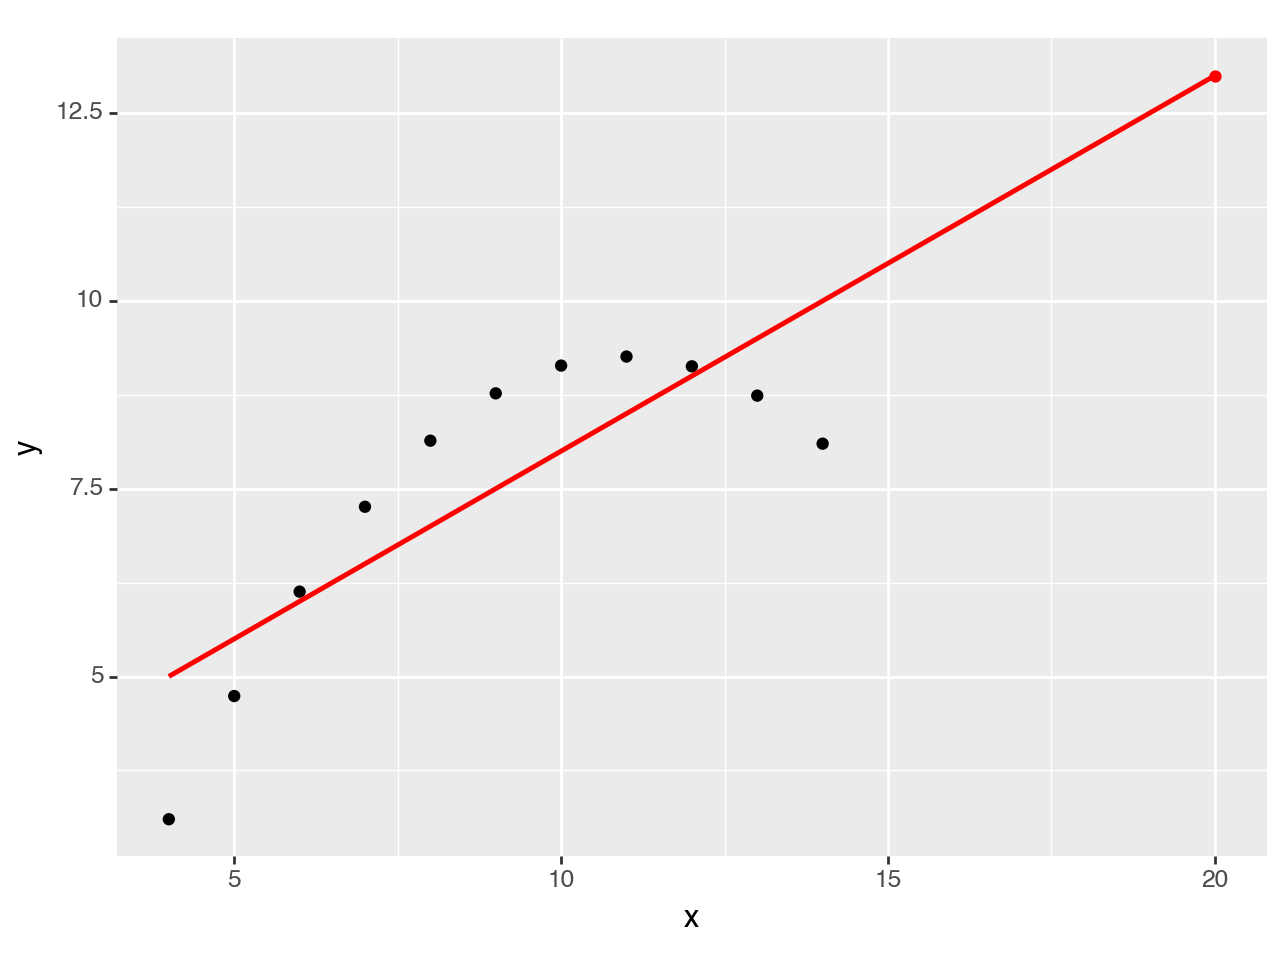

<Figure Size: (640 x 480)>

In [56]:
(ggplot(df2, aes(x='x', y='y')) + 
  geom_point() + 
  geom_point(data = newdata2, color = 'red') + 
  geom_smooth(method = "lm", se = False, fullrange = True, color = "red"))

#### Probably not right... a more appropriate model might be something like:

A polynomial regression model:
$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$$

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


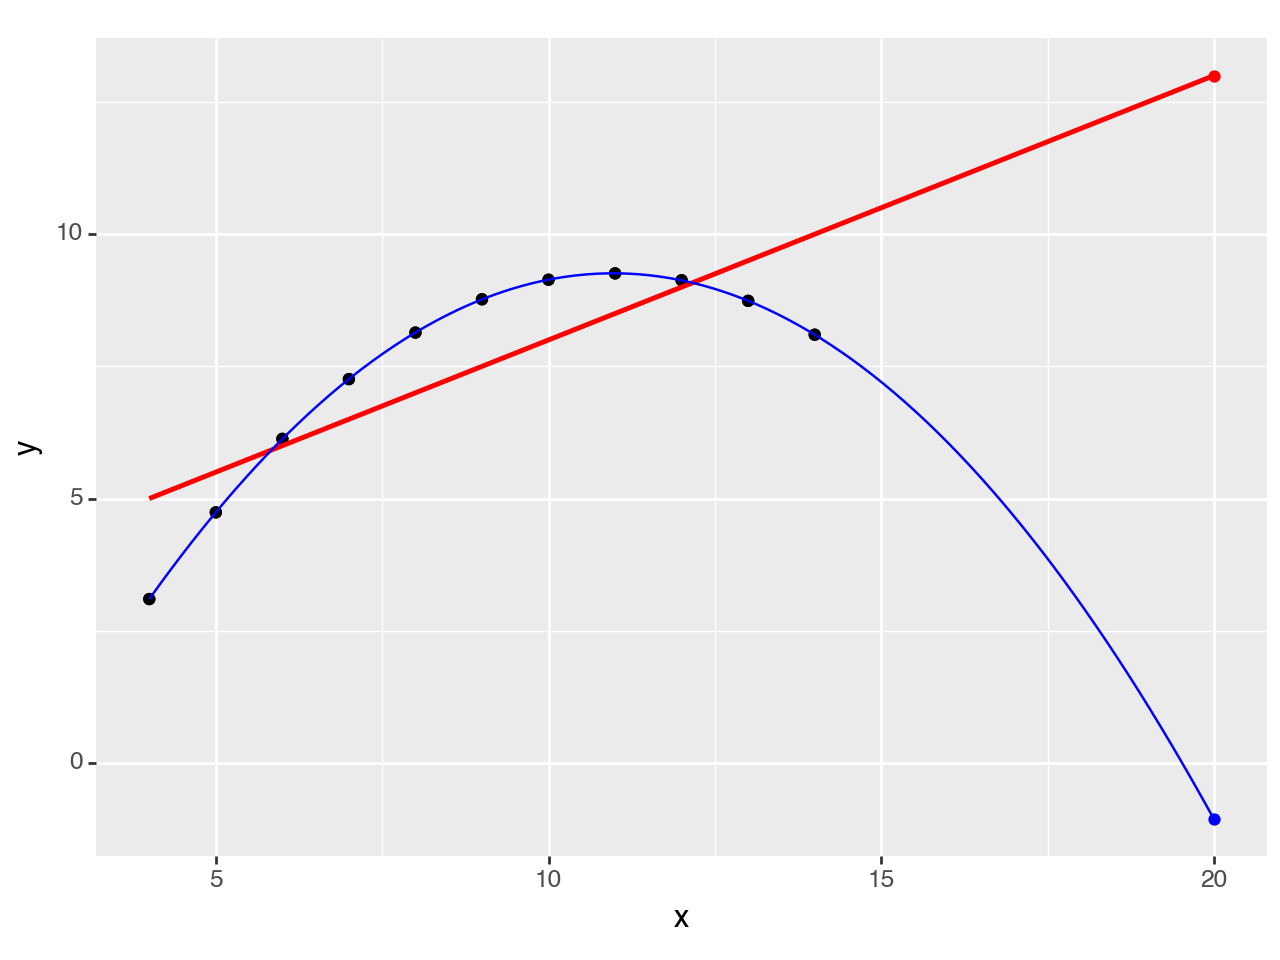

In [60]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features for anscombe dataset
poly = PolynomialFeatures(degree=2, include_bias=False)
df2_poly = df2.copy()
df2_poly[['x', 'x2']] = poly.fit_transform(df2[['x']])

# Fit polynomial model
poly_model = LinearRegression()
poly_model.fit(df2_poly[['x', 'x2']], df2['y'])

# Predict using the polynomial model
df2_poly['y_pred'] = poly_model.predict(df2_poly[['x', 'x2']])


new_x = np.array([[20]])  # Replace new_value with the new x value

new_x_poly = poly.transform(new_x)

# Predict the corresponding y value using the trained model
new_y_pred = poly_model.predict(new_x_poly)

quad_model_data = pd.DataFrame({
    'x': new_x[0],
    'y_pred': new_y_pred
})

df2_poly_wpred = pd.concat([df2_poly, quad_model_data])

# Create the plot
plot = (
    ggplot(df2, aes(x='x', y='y')) +
    geom_point() +
    geom_point(data=df2) +
    geom_point(data = newdata2, 
               color = 'red') + 
    geom_point(aes(x = 'x', y = 'y_pred'), 
               data = quad_model_data, 
               color = 'blue') + 
    stat_smooth(data=df2, method='lm', se=False, 
                fullrange=True, color='red') +  # Linear model
    stat_function(data = df2_poly_wpred, 
                  fun=lambda x: poly_model.coef_[1] * (x**2) + poly_model.coef_[0] * x + poly_model.intercept_, 
                  color='blue') #Quad model curve
)

# Display the plot
print(plot)

Very very different predictions for $x=20$!!

Linear regression is not always the answer. 

How could we have known that the linear model was not appropriate, before even trying to extrapolate?

One way is to detect a clear pattern in the residual plot:

## Residual plot 

In [65]:
df2.loc[:, 'residuals'] = (df2['y'] - mod2.predict(df2_poly['x']))

/var/folders/xp/wk0n_cc925g6bz7szq91rxhxpvk82n/T/ipykernel_90730/4294598756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


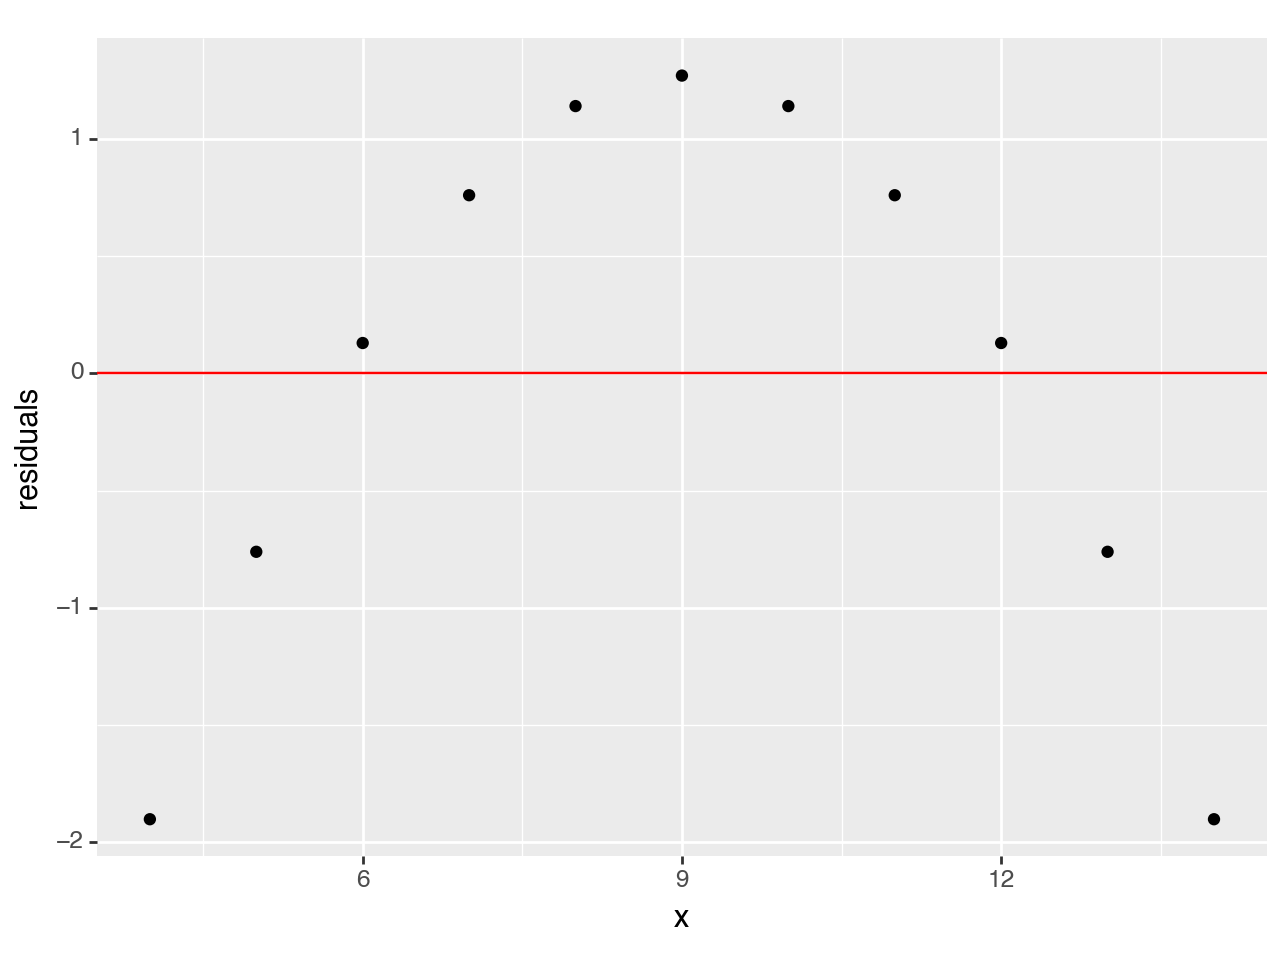

<Figure Size: (640 x 480)>

In [67]:
(ggplot(df2, aes(x='x', y='residuals'))  + 
  geom_hline(aes(yintercept = 0), color = 'red') + 
  geom_point() )

There's a clear pattern here – the regression systematically overpredicts, then underpredicts, then overpredicts again. This should be a clue that fitting a linear relationship between y and x without any transformations is not the move here. 

Note: Sometimes the residual plot puts the fitted values on the x-axis. The story is still the same – patterns in residuals $\implies$ this model probably isn't the most appropriate choice! 

**Bonus Content:** An artist's interpretation of some of the weird things that can happen when you start to extrapolate: https://vimeo.com/212731897